# Predicting Car Prices using KNN

In this project, we will use the K-nearest neighbors algorithm to predict car's market price using its attributes. The metric used to calculate the distance between observations is the Standard Euclidean. In this particular notebook, the validation process used is the Leave One Out Cross Validation (LOOCV).

### Importing libraries and the prepared file

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#from itertools import combinations
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate

In [2]:
# Importing the prepared csv file
numeric_cars = pd.read_csv("numeric_cars.csv")
price_col = numeric_cars['price']   
train_cols = numeric_cars.drop('price', axis=1).copy()

### Modeling

In [3]:
numeric_cars.head()

,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


In [4]:
# STANDARD MODEL
# Multivariate Model - all features
# Nearest Neighbours K = 5

loocv_n = len(train_cols)

knn = KNeighborsRegressor()
cv = cross_validate(knn, train_cols, price_col, cv=loocv_n, scoring = 'neg_mean_squared_error')
rmse_all = np.sqrt(-cv['test_score'])
rmse = rmse_all.mean()
rmse

2114.0378109452736

In [5]:
# FIRST MODEL
# Univariate Model - testing all features individually
# Nearest Neighbours K = 5
# Objective: start to analyze how good of a feature each column is.

results_1 = {}

for col in train_cols:
    knn = KNeighborsRegressor()
    cv = cross_validate(knn, train_cols[[col]], price_col, cv=loocv_n, scoring = 'neg_mean_squared_error')
    rmse_all = np.sqrt(-cv['test_score'])
    rmse = rmse_all.mean()
    results_1[col] = rmse
    
results_series_1 = pd.Series(results_1).sort_values()
results_series_1

engine-size         2205.852736
horsepower          2487.299502
curb-weight         2582.730348
highway-mpg         2665.800995
width               2902.041791
city-mpg            3010.253731
length              3150.014925
wheel-base          3284.076617
bore                4476.506468
compression-rate    4590.765174
height              4957.345274
stroke              5260.391045
peak-rpm            5994.433831
dtype: float64

In [6]:
# SECOND MODEL
# Univariate Model - testing all features individually
# Nearest Neighbours - testing all odd numbers from 1 to 15
# Objective: continue to analyze how good of a feature each column is.

n_neighbors = [1, 3, 5, 7, 9, 11, 13, 15]

results_2 = {}
mean_results_2 = {}

for col in train_cols:
    results_col = {}
    col_values = []
    for n in n_neighbors:
        knn = KNeighborsRegressor(n_neighbors=n)
        cv = cross_validate(knn, train_cols[[col]], price_col, cv=loocv_n, scoring = 'neg_mean_squared_error')
        rmse_all = np.sqrt(-cv['test_score'])
        rmse = rmse_all.mean()
        results_col[n] = rmse
        col_values.append(rmse)
    mean_results_2[col] = np.mean(col_values)
    results_2[col] = results_col
    
results_series_2 = pd.Series(results_2)
mean_results_series_2 = pd.Series(mean_results_2).sort_values()
mean_results_series_2

engine-size         2411.192856
curb-weight         2569.941593
horsepower          2680.345851
highway-mpg         2813.871309
width               2831.206680
city-mpg            3162.683690
length              3316.893790
wheel-base          3328.983846
compression-rate    4646.499586
bore                4797.012478
height              5054.555143
stroke              5221.951462
peak-rpm            5752.974157
dtype: float64

With the mean results, we get a more solid idea of how each column perform as a feature.  The graph below shows how they performed for each K number of neighbors tested out. 

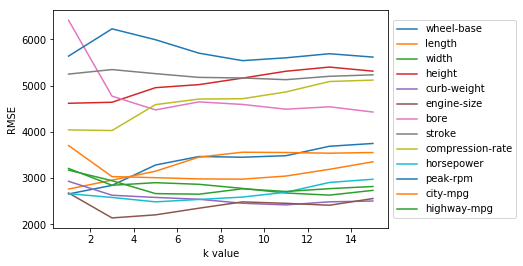

In [7]:
%matplotlib inline

for k,v in results_series_2.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')
    plt.legend(train_cols, loc='center left', bbox_to_anchor=(1, 0.5))
    #plt.title('')

In [8]:
# THIRD MODEL
# Multivariate Model - testing all number of X best features
# Nearest Neighbours K = 5
# Objective: begin to determine how many and which features to use in our multivariate model in order to get the lowest RMSE.

results_index = mean_results_series_2.index

results_3 = {}

for n in range(1, 14):
    features = []
    for i in range(0, n):
        col = results_index[i]
        features.append(col)
    knn = KNeighborsRegressor()
    cv = cross_validate(knn, train_cols[features], price_col, cv=loocv_n, scoring = 'neg_mean_squared_error')
    rmse_all = np.sqrt(-cv['test_score'])
    rmse = rmse_all.mean()
    results_3['{} best features'.format(n)] = rmse
    
results_series_3 = pd.Series(results_3).sort_values()
results_series_3

5 best features     1813.284577
4 best features     1827.445771
6 best features     1831.151244
7 best features     1846.646766
8 best features     1990.847761
3 best features     2022.827861
9 best features     2055.958209
13 best features    2114.037811
2 best features     2123.725373
12 best features    2160.142289
10 best features    2162.177114
11 best features    2171.486567
1 best features     2205.852736
dtype: float64

#### Important observations so far

Interpreting the results from the second and third model.

From the second model, we can see that, although the `curb-weight` variable has similar RMSE mean results in comparison to both `highway-mpg` and `city-mpg` variables, it's curve on the graph is less smoother at the beginning and there isn't a single K value in which the `curb-weight` RMSE is lower than the top 4.
In addition to this, from the second model, we have the information that using the 2, 3 or 4 best features has very similar RMSE values, those being way lower RMSE than using 5 or more.

Based on these observations, although using the 4 best features granted us the best results in the Third Model, if we test every combination of the 4 best features, we may find an even better combination.

In [9]:
# FOURTH MODEL
# Multivariate Model - testing all combinations of the 7 best features, with a minimum of 4 at the same time.
# Nearest Neighbours - testing all odd numbers from 1 to 15
# Objective: continue to determine how many features to use in our multivariate model in order to get the lowest RMSE.

def combinations(iterable, r):
    
    """ 
    This combination function is based on the homonym from the iteratools library.
    I modified it to return lists instead of tuples, so that I could use them in the
    cross_validate function. 
    """
    
    pool = list(iterable)
    n = len(pool)
    if r > n:
        return
    indices = list(range(r))
    yield list(pool[i] for i in indices)
    while True:
        for i in reversed(range(r)):
            if indices[i] != i + n - r:
                break
        else:
            return
        indices[i] += 1
        for j in range(i+1, r):
            indices[j] = indices[j-1] + 1
        yield list(pool[i] for i in indices)
        
b_s = results_index[0:7] #b_s are the seven best features in terms of RMSE, based on the results of the second model.

complete_c = []

for r in range(4,8):
    c = list(combinations(b_s, r))
    complete_c += c
    
    
results_4 = {}    
results_4_inverted = {}
for combination in complete_c:
    knn = KNeighborsRegressor()
    cv = cross_validate(knn, train_cols[combination], price_col, cv=loocv_n, scoring = 'neg_mean_squared_error')
    rmse_all = np.sqrt(-cv['test_score'])
    rmse = rmse_all.mean()
    results_4[str(combination)] = rmse
    results_4_inverted[rmse] = combination

results_4_inverted = dict(sorted(results_4_inverted.items()))
results_series_4 = pd.Series(results_4).sort_values()
results_series_4.head(20)

['curb-weight', 'horsepower', 'highway-mpg', 'width']                                         1723.689552
['engine-size', 'curb-weight', 'horsepower', 'width']                                         1758.814925
['engine-size', 'horsepower', 'width', 'city-mpg']                                            1773.475622
['engine-size', 'curb-weight', 'horsepower', 'width', 'city-mpg']                             1783.659701
['engine-size', 'curb-weight', 'horsepower', 'city-mpg', 'length']                            1796.833831
['engine-size', 'curb-weight', 'horsepower', 'highway-mpg', 'width']                          1813.284577
['engine-size', 'horsepower', 'city-mpg', 'length']                                           1820.769154
['engine-size', 'curb-weight', 'horsepower', 'highway-mpg']                                   1827.445771
['engine-size', 'curb-weight', 'horsepower', 'highway-mpg', 'width', 'city-mpg']              1831.151244
['engine-size', 'horsepower', 'highway-mpg', '

We can see an improvement in comparison to using the 5 best features from the second model, obtaining a minimum RMSE of 1723.69 when utilizing `curb-weight`, `horsepower`, `highway-mpg` and `width` features. All in all, we still need to tune the K value to reach the optimal model. For that, we will try out every K odd value from 1 to 15 for the 10 best feature choices from the Fourth Model.

In [11]:
# FIFTH MODEL
# Multivariate Model - using the best 10 feature choices from the Fourth Model
# Nearest Neighbours - testing all odd numbers from 1 to 15
# Objective: test the final model.


b_10_mv = list(results_4_inverted.values())[0:10]
b_10_mv
results_5 = {}
for feature_selection in b_10_mv:
    feature_results = {}
    for n in n_neighbors:
        knn = KNeighborsRegressor(n_neighbors=n)
        cv = cross_validate(knn, train_cols[feature_selection], price_col, cv=loocv_n, scoring = 'neg_mean_squared_error')
        rmse_all = np.sqrt(-cv['test_score'])
        rmse = rmse_all.mean()
        feature_results[n] = rmse
    results_5[str(feature_selection)] = feature_results

results_5

{"['curb-weight', 'horsepower', 'highway-mpg', 'width']": {1: 1581.3283582089553,
  3: 1736.1757877280265,
  5: 1723.6895522388058,
  7: 1883.5003553660272,
  9: 1976.2249861802102,
  11: 2082.875169606513,
  13: 2118.5288939915804,
  15: 2165.2945273631844},
 "['engine-size', 'curb-weight', 'horsepower', 'width']": {1: 1619.5870646766168,
  3: 1651.7429519071309,
  5: 1758.8149253731347,
  7: 1927.5771144278608,
  9: 1985.1061359867329,
  11: 2016.41157847128,
  13: 2071.325296593953,
  15: 2112.167495854063},
 "['engine-size', 'horsepower', 'width', 'city-mpg']": {1: 1730.5174129353234,
  3: 1797.0630182421226,
  5: 1773.4756218905472,
  7: 2002.9530916844353,
  9: 2072.5964621337753,
  11: 2157.836725463591,
  13: 2198.306926903942,
  15: 2279.8135986733},
 "['engine-size', 'curb-weight', 'horsepower', 'width', 'city-mpg']": {1: 1546.4825870646766,
  3: 1607.1260364842456,
  5: 1783.6597014925371,
  7: 1949.5948827292111,
  9: 2000.052515201769,
  11: 2038.8285843509725,
  13: 2096.

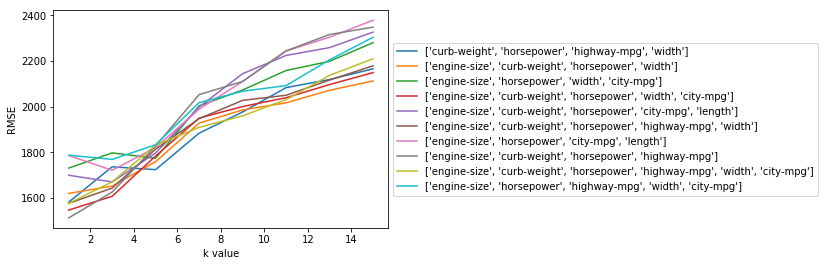

In [14]:
%matplotlib inline

for k,v in results_5.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')
    plt.legend(results_5.keys(), loc='center left', bbox_to_anchor=(1, 0.5))
    #plt.title('')

### Conclusions

With this analysis, by using the LOOCV, we conclude that the best K Nearest Neighbors Regressor model to use takes into consideration just the one nearest neighbor and utilizes the `engine-size`, `curb-weight`, `horsepower` e `highway-mpg` columns as features. The best obtained RMSE is 1512.26, that is 28.47% lower than the standard KNN scikit-learn model results with the same cross validation method, and 31.44% lower than the best univariate KNN model using the standard number of neighbors (K=5).